In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import numpy as np

%matplotlib inline

In [2]:
coffee_production_by_region = pd.read_csv('../data/coffee-production-by-region.csv')

In [3]:
coffee_production_by_region

,Entity,Code,Year,"Coffee, green | 00000656 || Production | 005510 || tonnes"
0,Africa,NaN,1961,870970.00
1,Africa,NaN,1962,883512.00
2,Africa,NaN,1963,996674.00
3,Africa,NaN,1964,1162048.00
4,Africa,NaN,1965,1075084.00
...,...,...,...,...
7091,Zimbabwe,ZWE,2017,683.33
7092,Zimbabwe,ZWE,2018,627.78
7093,Zimbabwe,ZWE,2019,670.37
7094,Zimbabwe,ZWE,2020,660.49


In [4]:
coffee_production_by_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7096 entries, 0 to 7095
Data columns (total 4 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Entity                                                     7096 non-null   object 
 1   Code                                                       5080 non-null   object 
 2   Year                                                       7096 non-null   int64  
 3   Coffee, green | 00000656 || Production | 005510 || tonnes  7096 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 221.9+ KB


In [5]:
coffee_production_by_region.isna().sum()

Entity                                                          0
Code                                                         2016
Year                                                            0
Coffee, green | 00000656 || Production | 005510 || tonnes       0
dtype: int64

In [6]:
coffee_production_by_region['Entity'].value_counts()

Entity
Africa                       61
Laos                         61
Philippines                  61
Peru                         61
Paraguay                     61
                             ..
Nepal                        31
Ethiopia                     29
Europe (FAO)                 28
Southern Europe (FAO)        28
European Union (27) (FAO)    28
Name: count, Length: 123, dtype: int64

In [7]:
coffee_production_by_region['Entity'].value_counts(dropna=False)

Entity
Africa                       61
Laos                         61
Philippines                  61
Peru                         61
Paraguay                     61
                             ..
Nepal                        31
Ethiopia                     29
Europe (FAO)                 28
Southern Europe (FAO)        28
European Union (27) (FAO)    28
Name: count, Length: 123, dtype: int64

In [8]:
coffee_production_by_region=coffee_production_by_region.rename(columns={'Coffee, green | 00000656 || Production | 005510 || tonnes':'Coffee,Green'})

In [9]:
coffee_production_by_region

,Entity,Code,Year,"Coffee,Green"
0,Africa,NaN,1961,870970.00
1,Africa,NaN,1962,883512.00
2,Africa,NaN,1963,996674.00
3,Africa,NaN,1964,1162048.00
4,Africa,NaN,1965,1075084.00
...,...,...,...,...
7091,Zimbabwe,ZWE,2017,683.33
7092,Zimbabwe,ZWE,2018,627.78
7093,Zimbabwe,ZWE,2019,670.37
7094,Zimbabwe,ZWE,2020,660.49


In [10]:
coffee_production_by_region.groupby('Entity')['Coffee,Green'].describe()

,count,mean,std,min,25%,50%,75%,max
Entity,,,,,,,,
Africa,61.0,1.155357e+06,1.290412e+05,811188.4,1.075084e+06,1165512.00,1.254209e+06,1431087.40
Africa (FAO),61.0,1.155357e+06,1.290412e+05,811188.4,1.075084e+06,1165512.00,1.254209e+06,1431087.40
Americas (FAO),61.0,3.844193e+06,9.742367e+05,1905543.0,3.096048e+06,3752510.00,4.622290e+06,6090466.00
Angola,61.0,5.972873e+04,8.483189e+04,1260.0,5.000000e+03,12931.88,5.748000e+04,235200.00
Asia,61.0,1.330636e+06,9.993853e+05,200714.0,4.102800e+05,915561.00,2.219260e+06,3358628.20
...,...,...,...,...,...,...,...,...
Western Asia (FAO),61.0,1.013004e+04,6.056384e+03,3970.0,4.943000e+03,7411.00,1.729200e+04,21848.96
World,61.0,6.378561e+06,1.938520e+06,3522508.0,4.725186e+06,6063096.00,7.930086e+06,10795444.00
Yemen,61.0,1.005858e+04,6.118994e+03,3810.0,4.823000e+03,7411.00,1.729200e+04,21848.96


In [11]:
coffee_2010_2020=coffee_production_by_region.loc[(coffee_production_by_region['Year']>=2010) & (coffee_production_by_region['Year']<=2020)]

In [12]:
coffee_2010_2020

,Entity,Code,Year,"Coffee,Green"
49,Africa,NaN,2010,1085218.60
50,Africa,NaN,2011,987478.40
51,Africa,NaN,2012,975107.44
52,Africa,NaN,2013,1104529.00
53,Africa,NaN,2014,1086611.50
...,...,...,...,...
7090,Zimbabwe,ZWE,2016,700.00
7091,Zimbabwe,ZWE,2017,683.33
7092,Zimbabwe,ZWE,2018,627.78
7093,Zimbabwe,ZWE,2019,670.37


In [13]:
coffee_2010_2020_region= coffee_2010_2020[coffee_2010_2020['Code'].isnull()]

In [14]:
coffee_2010_2020_region

,Entity,Code,Year,"Coffee,Green"
49,Africa,NaN,2010,1085218.60
50,Africa,NaN,2011,987478.40
51,Africa,NaN,2012,975107.44
52,Africa,NaN,2013,1104529.00
53,Africa,NaN,2014,1086611.50
...,...,...,...,...
6856,Western Asia (FAO),NaN,2016,18945.00
6857,Western Asia (FAO),NaN,2017,18767.00
6858,Western Asia (FAO),NaN,2018,18642.00
6859,Western Asia (FAO),NaN,2019,20812.00


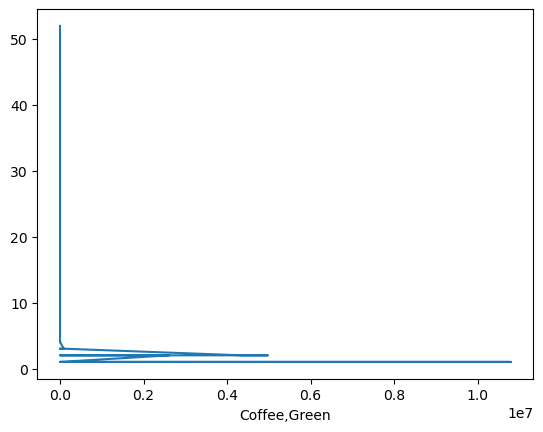

In [15]:
coffee_2010_2020['Coffee,Green'].value_counts().plot(kind = 'line');

In [16]:
print(coffee_2010_2020.dtypes)

Entity           object
Code             object
Year              int64
Coffee,Green    float64
dtype: object


In [17]:
coffee_production_region =coffee_2010_2020[coffee_2010_2020['Code'].isnull()]

In [18]:
agricultural_export_subsidies = pd.read_csv('../data/agricultural-export-subsidies.csv')

In [19]:
agricultural_export_subsidies

,Entity,Code,Year,2.b.1 - Agricultural export subsidies (millions of current United States dollars) - AG_PRD_XSUBDY
0,Africa (UN),NaN,1995,40660000.0
1,Africa (UN),NaN,1996,43500000.0
2,Africa (UN),NaN,1997,24290000.0
3,Africa (UN),NaN,1998,9960000.0
4,Africa (UN),NaN,1999,10930000.0
...,...,...,...,...
969,World,OWID_WRL,2017,197800000.0
970,World,OWID_WRL,2018,185730000.0
971,World,OWID_WRL,2019,77510000.0
972,World,OWID_WRL,2020,11660000.0


In [20]:
agricultural_export_subsidies.isna().sum()

Entity                                                                                                 0
Code                                                                                                 331
Year                                                                                                   0
2.b.1 - Agricultural export subsidies (millions of current United States dollars) - AG_PRD_XSUBDY      0
dtype: int64

agricultural_export_subsidies=agricultural_export_subsidies.drop('Code', axis=1)

In [21]:
agricultural_export_subsidies

,Entity,Code,Year,2.b.1 - Agricultural export subsidies (millions of current United States dollars) - AG_PRD_XSUBDY
0,Africa (UN),NaN,1995,40660000.0
1,Africa (UN),NaN,1996,43500000.0
2,Africa (UN),NaN,1997,24290000.0
3,Africa (UN),NaN,1998,9960000.0
4,Africa (UN),NaN,1999,10930000.0
...,...,...,...,...
969,World,OWID_WRL,2017,197800000.0
970,World,OWID_WRL,2018,185730000.0
971,World,OWID_WRL,2019,77510000.0
972,World,OWID_WRL,2020,11660000.0


In [22]:
agricultural_export_2010_2020=agricultural_export_subsidies.loc[(agricultural_export_subsidies['Year']>=2010) & (agricultural_export_subsidies['Year']<=2020)]

In [23]:
agricultural_export_2010_2020

,Entity,Code,Year,2.b.1 - Agricultural export subsidies (millions of current United States dollars) - AG_PRD_XSUBDY
15,Africa (UN),NaN,2010,7650000.0
16,Africa (UN),NaN,2011,16460000.0
17,Africa (UN),NaN,2012,12720000.0
18,Africa (UN),NaN,2013,7980000.0
19,Africa (UN),NaN,2014,18250000.0
...,...,...,...,...
968,World,OWID_WRL,2016,209640000.0
969,World,OWID_WRL,2017,197800000.0
970,World,OWID_WRL,2018,185730000.0
971,World,OWID_WRL,2019,77510000.0


In [24]:
print(agricultural_export_2010_2020.dtypes)

Entity                                                                                                object
Code                                                                                                  object
Year                                                                                                   int64
2.b.1 - Agricultural export subsidies (millions of current United States dollars) - AG_PRD_XSUBDY    float64
dtype: object


In [25]:
agricultural_export_2010_2020_region=agricultural_export_2010_2020[agricultural_export_2010_2020['Code'].isnull()]

In [26]:
agricultural_export_2010_2020_region

,Entity,Code,Year,2.b.1 - Agricultural export subsidies (millions of current United States dollars) - AG_PRD_XSUBDY
15,Africa (UN),NaN,2010,7650000.0
16,Africa (UN),NaN,2011,16460000.0
17,Africa (UN),NaN,2012,12720000.0
18,Africa (UN),NaN,2013,7980000.0
19,Africa (UN),NaN,2014,18250000.0
...,...,...,...,...
798,Sub-Saharan Africa (UN),NaN,2016,700000.0
799,Sub-Saharan Africa (UN),NaN,2017,150000.0
800,Sub-Saharan Africa (UN),NaN,2018,150000.0
801,Sub-Saharan Africa (UN),NaN,2019,60000.0


In [27]:
agricultural_area_per_capita = pd.read_csv('../data/agricultural-area-per-capita.csv')

In [28]:
agricultural_area_per_capita

,Entity,Code,Year,Agricultural land | 00006610 || Area | 5110pc || hectares per capita
0,Afghanistan,AFG,1961,4.288897
1,Afghanistan,AFG,1962,4.210031
2,Afghanistan,AFG,1963,4.128873
3,Afghanistan,AFG,1964,4.048203
4,Afghanistan,AFG,1965,3.959685
...,...,...,...,...
13253,Zimbabwe,ZWE,2016,1.120897
13254,Zimbabwe,ZWE,2017,1.098223
13255,Zimbabwe,ZWE,2018,1.076255
13256,Zimbabwe,ZWE,2019,1.055058


In [29]:
agricultural_area_per_capita=agricultural_area_per_capita.rename(columns={'Agricultural land | 00006610 || Area | 5110pc || hectares per capita':'Agricultural land hectares per capita'})

agricultural_area_per_capita=agricultural_area_per_capita.drop('Code', axis=1)

In [30]:
agricultural_area_2010_2020=agricultural_area_per_capita.loc[(agricultural_area_per_capita['Year']>=2010) & (agricultural_area_per_capita['Year']<=2020)]

In [31]:
print(agricultural_area_2010_2020.dtypes)

Entity                                    object
Code                                      object
Year                                       int64
Agricultural land hectares per capita    float64
dtype: object


In [32]:
agricultural_area_2010_2020_region=agricultural_area_2010_2020[agricultural_area_2010_2020['Code'].isnull()]

In [33]:
agricultural_area_2010_2020_region

,Entity,Code,Year,Agricultural land hectares per capita
109,Africa,NaN,2010,0.990905
110,Africa,NaN,2011,0.969465
111,Africa,NaN,2012,0.996507
112,Africa,NaN,2013,0.974610
113,Africa,NaN,2014,0.951014
...,...,...,...,...
12593,Upper-middle-income countries,NaN,2016,0.748835
12594,Upper-middle-income countries,NaN,2017,0.743871
12595,Upper-middle-income countries,NaN,2018,0.737719
12596,Upper-middle-income countries,NaN,2019,0.732815


coffee_2010_2020_region , agricultural_export_2010_2020_region, agricultural_area_2010_2020_region

In [34]:
coffee_2010_2020_region_export =pd.merge(agricultural_export_2010_2020_region,coffee_2010_2020_region, left_on= 'Year',right_on='Year',how='inner')


In [35]:
coffee_2010_2020_region_export

,Entity_x,Code_x,Year,2.b.1 - Agricultural export subsidies (millions of current United States dollars) - AG_PRD_XSUBDY,Entity_y,Code_y,"Coffee,Green"
0,Africa (UN),NaN,2010,7650000.0,Africa,NaN,1085218.60
1,Africa (UN),NaN,2010,7650000.0,Africa (FAO),NaN,1085218.60
2,Africa (UN),NaN,2010,7650000.0,Americas (FAO),NaN,4960499.00
3,Africa (UN),NaN,2010,7650000.0,Asia,NaN,2379412.20
4,Africa (UN),NaN,2010,7650000.0,Asia (FAO),NaN,2379412.20
...,...,...,...,...,...,...,...
4183,Sub-Saharan Africa (UN),NaN,2020,10000.0,South-eastern Asia (FAO),NaN,2791449.00
4184,Sub-Saharan Africa (UN),NaN,2020,10000.0,Southern Asia (FAO),NaN,305021.60
4185,Sub-Saharan Africa (UN),NaN,2020,10000.0,Upper-middle-income countries,NaN,5572097.00
4186,Sub-Saharan Africa (UN),NaN,2020,10000.0,Western Africa (FAO),NaN,169713.88


In [36]:
coffee_2010_2020_region_export=coffee_2010_2020_region_export.drop('Entity_x', axis =1)

In [37]:
coffee_2010_2020_region_export=coffee_2010_2020_region_export.drop('Code_x',axis=1)

In [38]:
coffee_2010_2020_region_export=coffee_2010_2020_region_export.rename(columns={'2.b.1 - Agricultural export subsidies (millions of current United States dollars) - AG_PRD_XSUBDY':'Agricultural export $'})

In [104]:
coffee_2010_2020_region_export.Code_y.value_counts()

Series([], Name: count, dtype: int64)

In [40]:
coffee_2010_2020_region_area =pd.merge(agricultural_area_2010_2020_region,coffee_2010_2020_region, left_on= 'Year',right_on='Year',how='inner')


In [41]:
coffee_2010_2020_region_area

,Entity_x,Code_x,Year,Agricultural land hectares per capita,Entity_y,Code_y,"Coffee,Green"
0,Africa,NaN,2010,0.990905,Africa,NaN,1085218.60
1,Africa,NaN,2010,0.990905,Africa (FAO),NaN,1085218.60
2,Africa,NaN,2010,0.990905,Americas (FAO),NaN,4960499.00
3,Africa,NaN,2010,0.990905,Asia,NaN,2379412.20
4,Africa,NaN,2010,0.990905,Asia (FAO),NaN,2379412.20
...,...,...,...,...,...,...,...
3865,Upper-middle-income countries,NaN,2020,0.729497,South-eastern Asia (FAO),NaN,2791449.00
3866,Upper-middle-income countries,NaN,2020,0.729497,Southern Asia (FAO),NaN,305021.60
3867,Upper-middle-income countries,NaN,2020,0.729497,Upper-middle-income countries,NaN,5572097.00
3868,Upper-middle-income countries,NaN,2020,0.729497,Western Africa (FAO),NaN,169713.88


In [42]:
coffee_2010_2020_region_area=coffee_2010_2020_region_area.drop('Entity_x',axis=1)

In [43]:
coffee_2010_2020_region_area=coffee_2010_2020_region_area.drop('Code_x',axis=1)

In [44]:
coffee_2010_2020_region_area

,Year,Agricultural land hectares per capita,Entity_y,Code_y,"Coffee,Green"
0,2010,0.990905,Africa,NaN,1085218.60
1,2010,0.990905,Africa (FAO),NaN,1085218.60
2,2010,0.990905,Americas (FAO),NaN,4960499.00
3,2010,0.990905,Asia,NaN,2379412.20
4,2010,0.990905,Asia (FAO),NaN,2379412.20
...,...,...,...,...,...
3865,2020,0.729497,South-eastern Asia (FAO),NaN,2791449.00
3866,2020,0.729497,Southern Asia (FAO),NaN,305021.60
3867,2020,0.729497,Upper-middle-income countries,NaN,5572097.00
3868,2020,0.729497,Western Africa (FAO),NaN,169713.88


In [45]:
coffee_2010_2020_region_export

,Year,Agricultural export $,Entity_y,Code_y,"Coffee,Green"
0,2010,7650000.0,Africa,NaN,1085218.60
1,2010,7650000.0,Africa (FAO),NaN,1085218.60
2,2010,7650000.0,Americas (FAO),NaN,4960499.00
3,2010,7650000.0,Asia,NaN,2379412.20
4,2010,7650000.0,Asia (FAO),NaN,2379412.20
...,...,...,...,...,...
4183,2020,10000.0,South-eastern Asia (FAO),NaN,2791449.00
4184,2020,10000.0,Southern Asia (FAO),NaN,305021.60
4185,2020,10000.0,Upper-middle-income countries,NaN,5572097.00
4186,2020,10000.0,Western Africa (FAO),NaN,169713.88


1,How does the amount of agricultural export subsidies affect coffee production in different regions over time? 


In [46]:

print(coffee_2010_2020_region_export.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4188 entries, 0 to 4187
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   4188 non-null   int64  
 1   Agricultural export $  4188 non-null   float64
 2   Entity_y               4188 non-null   object 
 3   Code_y                 0 non-null      object 
 4   Coffee,Green           4188 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 163.7+ KB
None


In [47]:
print(coffee_2010_2020_region_export.isnull().sum())
#no null values to drop, the code_y is null becuse regions dont have code countries do, and for this question we are looking at regions 

Year                        0
Agricultural export $       0
Entity_y                    0
Code_y                   4188
Coffee,Green                0
dtype: int64


In [48]:
grouped_data = coffee_2010_2020_region_export.groupby(['Entity_y', 'Year']).sum()
grouped_data=grouped_data.reset_index()

In [49]:
relation_export_coffee_production = grouped_data.drop('Code_y', axis=1)


In [50]:
relation_export_coffee_production

,Entity_y,Year,Agricultural export $,"Coffee,Green"
0,Africa,2010,1.074590e+09,13022623.20
1,Africa,2011,1.085920e+09,11849740.80
2,Africa,2012,7.965500e+08,11701289.28
3,Africa,2013,5.855700e+08,14358877.00
4,Africa,2014,5.083200e+08,14125949.50
...,...,...,...,...
341,Western Asia (FAO),2016,4.705300e+08,227340.00
342,Western Asia (FAO),2017,4.487500e+08,225204.00
343,Western Asia (FAO),2018,4.194300e+08,223704.00
344,Western Asia (FAO),2019,2.090000e+08,249744.00


In [51]:
relation_export_coffee_production.rename(columns={'Entity_y':'Region'})

,Region,Year,Agricultural export $,"Coffee,Green"
0,Africa,2010,1.074590e+09,13022623.20
1,Africa,2011,1.085920e+09,11849740.80
2,Africa,2012,7.965500e+08,11701289.28
3,Africa,2013,5.855700e+08,14358877.00
4,Africa,2014,5.083200e+08,14125949.50
...,...,...,...,...
341,Western Asia (FAO),2016,4.705300e+08,227340.00
342,Western Asia (FAO),2017,4.487500e+08,225204.00
343,Western Asia (FAO),2018,4.194300e+08,223704.00
344,Western Asia (FAO),2019,2.090000e+08,249744.00


In [52]:
relation_export_coffee=relation_export_coffee_production.to_csv('../data/relation_export_coffee.csv')

relation_export_coffee_production.to_excel('relation_export_coffee_production.xlsx')

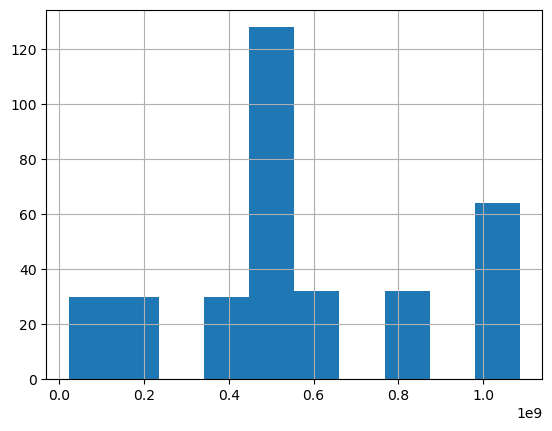

In [53]:
relation_export_coffee_production['Agricultural export $'].hist();

2,How does the amount of agricultural land per capita affect coffee production in different regions?

In [54]:
coffee_2010_2020_region_area

,Year,Agricultural land hectares per capita,Entity_y,Code_y,"Coffee,Green"
0,2010,0.990905,Africa,NaN,1085218.60
1,2010,0.990905,Africa (FAO),NaN,1085218.60
2,2010,0.990905,Americas (FAO),NaN,4960499.00
3,2010,0.990905,Asia,NaN,2379412.20
4,2010,0.990905,Asia (FAO),NaN,2379412.20
...,...,...,...,...,...
3865,2020,0.729497,South-eastern Asia (FAO),NaN,2791449.00
3866,2020,0.729497,Southern Asia (FAO),NaN,305021.60
3867,2020,0.729497,Upper-middle-income countries,NaN,5572097.00
3868,2020,0.729497,Western Africa (FAO),NaN,169713.88


In [55]:
grouped_data_area = coffee_2010_2020_region_area.groupby(['Entity_y', 'Year']).sum()
grouped_data_area=grouped_data_area.reset_index()

In [56]:
grouped_data_area

,Entity_y,Year,Agricultural land hectares per capita,Code_y,"Coffee,Green"
0,Africa,2010,21.949675,0,13022623.20
1,Africa,2011,22.116126,0,11849740.80
2,Africa,2012,18.482575,0,10726181.84
3,Africa,2013,17.805802,0,12149819.00
4,Africa,2014,17.596889,0,11952726.50
...,...,...,...,...,...
341,Western Asia (FAO),2016,16.267437,0,208395.00
342,Western Asia (FAO),2017,16.766071,0,206437.00
343,Western Asia (FAO),2018,16.197644,0,205062.00
344,Western Asia (FAO),2019,16.051524,0,228932.00


In [57]:
relation_area_coffee_production = grouped_data_area.drop('Code_y', axis=1)

In [58]:
relation_area_coffee_production=relation_area_coffee_production.rename(columns={'Entity_y':'Region'})

In [59]:
relation_area_coffee_production

,Region,Year,Agricultural land hectares per capita,"Coffee,Green"
0,Africa,2010,21.949675,13022623.20
1,Africa,2011,22.116126,11849740.80
2,Africa,2012,18.482575,10726181.84
3,Africa,2013,17.805802,12149819.00
4,Africa,2014,17.596889,11952726.50
...,...,...,...,...
341,Western Asia (FAO),2016,16.267437,208395.00
342,Western Asia (FAO),2017,16.766071,206437.00
343,Western Asia (FAO),2018,16.197644,205062.00
344,Western Asia (FAO),2019,16.051524,228932.00


relation_area_coffee_production.to_excel('relation_area_coffee_production.xlsx')

In [60]:
relation_area_coffee=relation_area_coffee_production.to_csv('../data/relation_area_coffee.csv')

3, What is the relationship between coffee production and economic development?

In [61]:
World_economic = pd.read_excel('../data/world_eco.xlsx')

In [62]:
World_economic

,Economy,Code,Region,Income group,Lending category
0,Aruba,ABW,Latin America & Caribbean,High income,NaN
1,Afghanistan,AFG,South Asia,Low income,IDA
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,IBRD
3,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD
4,Andorra,AND,Europe & Central Asia,High income,NaN
...,...,...,...,...,...
262,Sub-Saharan Africa,SSF,NaN,NaN,NaN
263,Sub-Saharan Africa (excluding high income),SSA,NaN,NaN,NaN
264,Sub-Saharan Africa (IDA & IBRD),TSS,NaN,NaN,NaN
265,Upper middle income,UMC,NaN,NaN,NaN


In [63]:
coffee_production_country = coffee_production_by_region.dropna(subset=['Code'])

In [64]:
coffee_economic_country =pd.merge(coffee_production_country,World_economic, left_on= 'Code',right_on='Code',how='inner')


In [65]:
coffee_economic_country

,Entity,Code,Year,"Coffee,Green",Economy,Region,Income group,Lending category
0,Angola,AGO,1961,168600.00,Angola,Sub-Saharan Africa,Lower middle income,IBRD
1,Angola,AGO,1962,185000.00,Angola,Sub-Saharan Africa,Lower middle income,IBRD
2,Angola,AGO,1963,168300.00,Angola,Sub-Saharan Africa,Lower middle income,IBRD
3,Angola,AGO,1964,198200.00,Angola,Sub-Saharan Africa,Lower middle income,IBRD
4,Angola,AGO,1965,205000.00,Angola,Sub-Saharan Africa,Lower middle income,IBRD
...,...,...,...,...,...,...,...,...
4721,Zimbabwe,ZWE,2017,683.33,Zimbabwe,Sub-Saharan Africa,Lower middle income,Blend
4722,Zimbabwe,ZWE,2018,627.78,Zimbabwe,Sub-Saharan Africa,Lower middle income,Blend
4723,Zimbabwe,ZWE,2019,670.37,Zimbabwe,Sub-Saharan Africa,Lower middle income,Blend
4724,Zimbabwe,ZWE,2020,660.49,Zimbabwe,Sub-Saharan Africa,Lower middle income,Blend


In [66]:
coffee_economic_country=coffee_economic_country.drop('Entity',axis=1)

In [67]:
coffee_economic_country

,Code,Year,"Coffee,Green",Economy,Region,Income group,Lending category
0,AGO,1961,168600.00,Angola,Sub-Saharan Africa,Lower middle income,IBRD
1,AGO,1962,185000.00,Angola,Sub-Saharan Africa,Lower middle income,IBRD
2,AGO,1963,168300.00,Angola,Sub-Saharan Africa,Lower middle income,IBRD
3,AGO,1964,198200.00,Angola,Sub-Saharan Africa,Lower middle income,IBRD
4,AGO,1965,205000.00,Angola,Sub-Saharan Africa,Lower middle income,IBRD
...,...,...,...,...,...,...,...
4721,ZWE,2017,683.33,Zimbabwe,Sub-Saharan Africa,Lower middle income,Blend
4722,ZWE,2018,627.78,Zimbabwe,Sub-Saharan Africa,Lower middle income,Blend
4723,ZWE,2019,670.37,Zimbabwe,Sub-Saharan Africa,Lower middle income,Blend
4724,ZWE,2020,660.49,Zimbabwe,Sub-Saharan Africa,Lower middle income,Blend


In [68]:
coffee_economic_country=coffee_economic_country.loc[(coffee_economic_country['Year']>=2010) & (coffee_economic_country['Year']<=2020)]

In [69]:
coffee_economic_country

,Code,Year,"Coffee,Green",Economy,Region,Income group,Lending category
49,AGO,2010,9951.00,Angola,Sub-Saharan Africa,Lower middle income,IBRD
50,AGO,2011,10192.00,Angola,Sub-Saharan Africa,Lower middle income,IBRD
51,AGO,2012,11740.03,Angola,Sub-Saharan Africa,Lower middle income,IBRD
52,AGO,2013,12550.00,Angola,Sub-Saharan Africa,Lower middle income,IBRD
53,AGO,2014,15009.00,Angola,Sub-Saharan Africa,Lower middle income,IBRD
...,...,...,...,...,...,...,...
4720,ZWE,2016,700.00,Zimbabwe,Sub-Saharan Africa,Lower middle income,Blend
4721,ZWE,2017,683.33,Zimbabwe,Sub-Saharan Africa,Lower middle income,Blend
4722,ZWE,2018,627.78,Zimbabwe,Sub-Saharan Africa,Lower middle income,Blend
4723,ZWE,2019,670.37,Zimbabwe,Sub-Saharan Africa,Lower middle income,Blend


In [70]:
coffee_economic_country_grouped = coffee_economic_country.groupby(['Income group', 'Year']).sum()


In [71]:
coffee_economic_country_grouped 

Code  \
Income group        Year                                                      
High income         2010                        PYFGUYNCLPANPRIESPTWNTTOUSA   
                    2011                        PYFGUYNCLPANPRIESPTWNTTOUSA   
                    2012                        PYFGUYNCLPANPRIESPTWNTTOUSA   
                    2013                        PYFGUYNCLPANPRIESPTWNTTOUSA   
                    2014                        PYFGUYNCLPANPRIESPTWNTTOUSA   
                    2015                        PYFGUYNCLPANPRIESPTWNTTOUSA   
                    2016                        PYFGUYNCLPANPRIESPTWNTTOUSA   
                    2017                        PYFGUYNCLPANPRIESPTWNTTOUSA   
                    2018                           PYFGUYNCLPANPRITWNTTOUSA   
                    2019                           PYFGUYNCLPANPRITWNTTOUSA   
                    2020                           PYFGUYNCLPANPRITWNTTOUSA   
Low income          2010            BDICAFCODETHLBRMDGMWIMOZRWASLETGOUGAYEM   
                    2011            BDICAFCODETHLBRMDGMWIMOZRWASLETGOUGAYEM   
                    2012            BDICAFCODETHLBRMDGMWIMOZRWASLETGOUGAYEM   
                    2013            BDICAFCODETHLBRMDGMWIMOZRWASLETGOUGAYEM   
                    2014            BDICAFCODETHLBRMDGMWIMOZRWASLETGOUGAYEM   
                    2015            BDICAFCODETHLBRMDGMWIMOZRWASLETGOUGAYEM   
                    2016            BDICAFCODETHLBRMDGMWIMOZRWASLETGOUGAYEM   
                    2017            BDICAFCODETHLBRMDGMWIMOZRWASLETGOUGAYEM   
                    2018            BDICAFCODETHLBRMDGMWIMOZRWASLETGOUGAYEM   
                    2019            BDICAFCODETHLBRMDGMWIMOZRWASLETGOUGAYEM   
                    2020            BDICAFCODETHLBRMDGMWIMOZRWASLETGOUGAYEM   
Lower middle income 2010  AGOBENBOLKHMCMRCPVCOMCOGCIVTLSGHAGINHTIHNDINDK...   
                    2011  AGOBENBOLKHMCMRCPVCOMCOGCIVTLSGHAGINHTIHNDINDK...   
                    2012  AGOBENBOLKHMCMRCPVCOMCOGCIVTLSGHAGINHTIHNDINDK...   
                    2013  AGOBENBOLKHMCMRCPVCOMCOGCIVTLSGHAGINHTIHNDINDK...   
                    2014  AGOBENBOLKHMCMRCPVCOMCOGCIVTLSGHAGINHTIHNDINDK...   
                    2015  AGOBENBOLKHMCMRCPVCOMCOGCIVTLSGHAGINHTIHNDINDK...   
                    2016  AGOBENBOLKHMCMRCPVCOMCOGCIVTLSGHAGINHTIHNDINDK...   
                    2017  AGOBENBOLKHMCMRCPVCOMCOGCIVTLSGHAGINHTIHNDINDK...   
                    2018  AGOBENBOLKHMCMRCPVCOMCOGCIVTLSGHAGINHTIHNDINDK...   
                    2019  AGOBENBOLKHMCMRCPVCOMCOGCIVTLSGHAGINHTIHNDINDK...   
                    2020  AGOBENBOLKHMCMRCPVCOMCOGCIVTLSGHAGINHTIHNDINDK...   
Upper middle income 2010  BLZBRACHNCOLCRICUBDMADOMECUSLVGNQFJIGABGTMIDNJ...   
                    2011  BLZBRACHNCOLCRICUBDMADOMECUSLVGNQFJIGABGTMIDNJ...   
                    2012  BLZBRACHNCOLCRICUBDMADOMECUSLVGNQFJIGABGTMIDNJ...   
                    2013  BLZBRACHNCOLCRICUBDMADOMECUSLVGNQFJIGABGTMIDNJ...   
                    2014  BLZBRACHNCOLCRICUBDMADOMECUSLVGNQFJIGABGTMIDNJ...   
                    2015  BLZBRACHNCOLCRICUBDMADOMECUSLVGNQFJIGABGTMIDNJ...   
                    2016  BLZBRACHNCOLCRICUBDMADOMECUSLVGNQFJIGABGTMIDNJ...   
                    2017  BLZBRACHNCOLCRICUBDMADOMECUSLVGNQFJIGABGTMIDNJ...   
                    2018  BLZBRACHNCOLCRICUBDMADOMECUSLVGNQFJIGABGTMIDNJ...   
                    2019  BLZBRACHNCOLCRICUBDMADOMECUSLVGNQFJIGABGTMIDNJ...   
                    2020  BLZBRACHNCOLCRICUBDMADOMECUSLVGNQFJIGABGTMIDNJ...   

                          Coffee,Green  \
Income group        Year                 
High income         2010      23394.35   
                    2011      19841.39   
                    2012      19349.94   
                    2013      15976.83   
                    2014      15528.56   
                    2015      14458.11   
                    2016      14504.48   
                    2017      14990.02   
                

C:\Users\willi\AppData\Local\Temp\ipykernel_6248\413440779.py:3: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data = coffee_economic_country ,


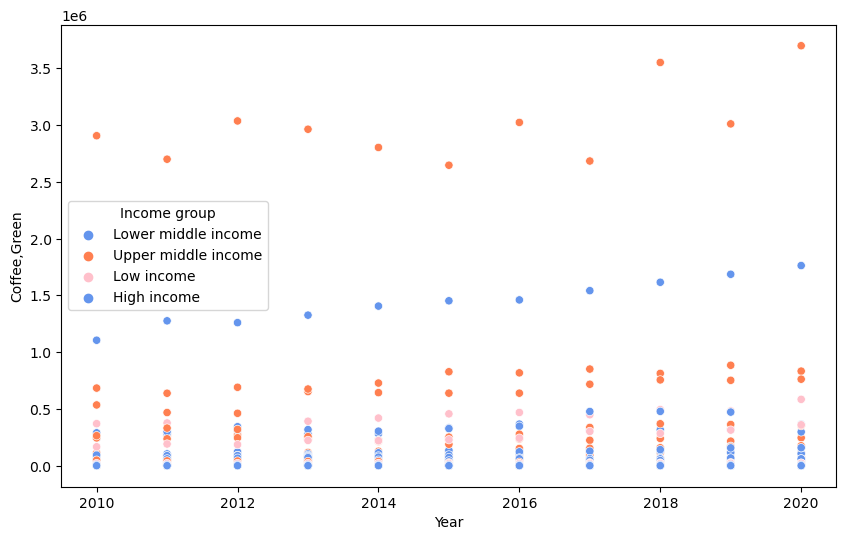

In [72]:
plt.figure(figsize = (10,6))

sns.scatterplot(data = coffee_economic_country ,
               x = 'Year',
               y = 'Coffee,Green',
               hue = 'Income group',
               palette = ['cornflowerblue', 'coral', 'pink']);

coffee_economic_country.to_exce('coffee_economic_country.xlsx')

In [73]:
coffee_economic_country

,Code,Year,"Coffee,Green",Economy,Region,Income group,Lending category
49,AGO,2010,9951.00,Angola,Sub-Saharan Africa,Lower middle income,IBRD
50,AGO,2011,10192.00,Angola,Sub-Saharan Africa,Lower middle income,IBRD
51,AGO,2012,11740.03,Angola,Sub-Saharan Africa,Lower middle income,IBRD
52,AGO,2013,12550.00,Angola,Sub-Saharan Africa,Lower middle income,IBRD
53,AGO,2014,15009.00,Angola,Sub-Saharan Africa,Lower middle income,IBRD
...,...,...,...,...,...,...,...
4720,ZWE,2016,700.00,Zimbabwe,Sub-Saharan Africa,Lower middle income,Blend
4721,ZWE,2017,683.33,Zimbabwe,Sub-Saharan Africa,Lower middle income,Blend
4722,ZWE,2018,627.78,Zimbabwe,Sub-Saharan Africa,Lower middle income,Blend
4723,ZWE,2019,670.37,Zimbabwe,Sub-Saharan Africa,Lower middle income,Blend


In [74]:
Economy_coffee=coffee_economic_country.to_csv('../data/coffee_eco_country.csv')

4,How does the availability of agricultural land per capita correlate with regional coffee production?

In [75]:
coffee_2010_2020_region_area

,Year,Agricultural land hectares per capita,Entity_y,Code_y,"Coffee,Green"
0,2010,0.990905,Africa,NaN,1085218.60
1,2010,0.990905,Africa (FAO),NaN,1085218.60
2,2010,0.990905,Americas (FAO),NaN,4960499.00
3,2010,0.990905,Asia,NaN,2379412.20
4,2010,0.990905,Asia (FAO),NaN,2379412.20
...,...,...,...,...,...
3865,2020,0.729497,South-eastern Asia (FAO),NaN,2791449.00
3866,2020,0.729497,Southern Asia (FAO),NaN,305021.60
3867,2020,0.729497,Upper-middle-income countries,NaN,5572097.00
3868,2020,0.729497,Western Africa (FAO),NaN,169713.88


In [76]:
correlation_coefficient = coffee_2010_2020_region_area["Coffee,Green"].corr(coffee_2010_2020_region_area["Agricultural land hectares per capita"])


In [77]:
print(f"Correlation coefficient between coffee production and agricultural land per capita: {correlation_coefficient}")


Correlation coefficient between coffee production and agricultural land per capita: -0.004520472777113518


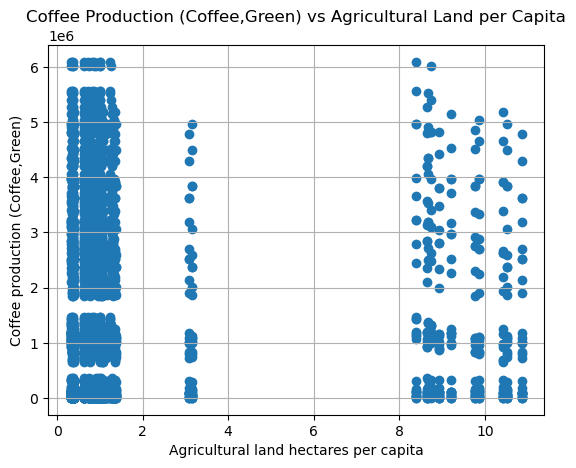

In [78]:
plt.scatter(coffee_2010_2020_region_area["Agricultural land hectares per capita"], coffee_2010_2020_region_area["Coffee,Green"])
plt.xlabel("Agricultural land hectares per capita")
plt.ylabel("Coffee production (Coffee,Green)")
plt.title("Coffee Production (Coffee,Green) vs Agricultural Land per Capita")
plt.grid(True)
plt.show()

5,Are there regions where the amount of available land has a significant impact on the volume of coffee produced?


In [79]:
percentage_change = (coffee_2010_2020_region_area["Coffee,Green"] / coffee_2010_2020_region_area["Agricultural land hectares per capita"]).mean()


percentage_change

6,How has coffee production varied across different regions over the years?

In [80]:
average_production = coffee_2010_2020_region_area.groupby(["Year", "Entity_y"])["Coffee,Green"].mean()

In [81]:
average_production

Year  Entity_y                     
2010  Africa                           1085218.60
      Africa (FAO)                     1085218.60
      Americas (FAO)                   4960499.00
      Asia                             2379412.20
      Asia (FAO)                       2379412.20
                                          ...    
2020  South-eastern Asia (FAO)         2791449.00
      Southern Asia (FAO)               305021.60
      Upper-middle-income countries    5572097.00
      Western Africa (FAO)              169713.88
      Western Asia (FAO)                 21848.96
Name: Coffee,Green, Length: 346, dtype: float64

In [82]:
average_production_table = average_production.unstack()


<Figure size 3400x3400 with 0 Axes>

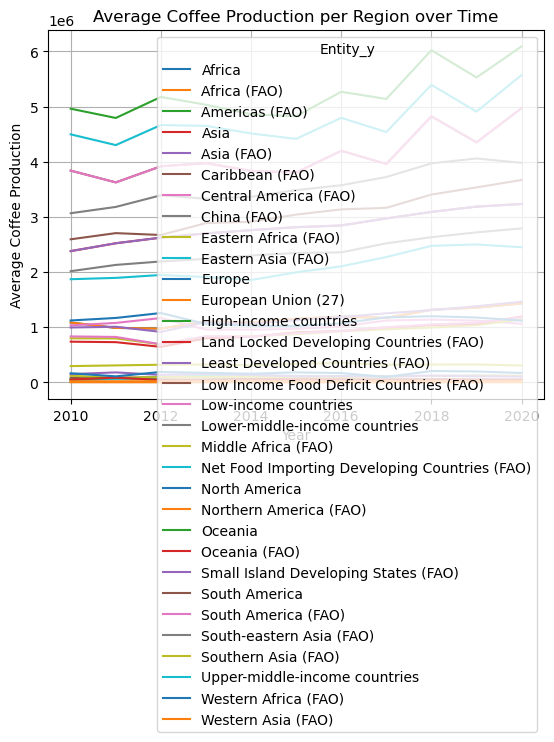

In [83]:

plt.figure(figsize=(34, 34))
average_production_table.plot()
plt.xlabel("Year")
plt.ylabel("Average Coffee Production")
plt.title("Average Coffee Production per Region over Time")
#plt.legend(title="Region")
plt.grid(True)
plt.show()


In [84]:
high_production_regions = average_production_table.mean() > average_production_table.mean().mean()

low_production_regions = average_production_table.mean() < average_production_table.mean().mean()


In [85]:
high_production_regions

Entity_y
Africa                                           False
Africa (FAO)                                     False
Americas (FAO)                                    True
Asia                                              True
Asia (FAO)                                        True
Caribbean (FAO)                                  False
Central America (FAO)                            False
China (FAO)                                      False
Eastern Africa (FAO)                             False
Eastern Asia (FAO)                               False
Europe                                           False
European Union (27)                              False
High-income countries                            False
Land Locked Developing Countries (FAO)           False
Least Developed Countries (FAO)                  False
Low Income Food Deficit Countries (FAO)           True
Low-income countries                             False
Lower-middle-income countries                     True
M

In [86]:
low_production_regions

Entity_y
Africa                                            True
Africa (FAO)                                      True
Americas (FAO)                                   False
Asia                                             False
Asia (FAO)                                       False
Caribbean (FAO)                                   True
Central America (FAO)                             True
China (FAO)                                       True
Eastern Africa (FAO)                              True
Eastern Asia (FAO)                                True
Europe                                            True
European Union (27)                               True
High-income countries                             True
Land Locked Developing Countries (FAO)            True
Least Developed Countries (FAO)                   True
Low Income Food Deficit Countries (FAO)          False
Low-income countries                              True
Lower-middle-income countries                    False
M

7,Are there specific regions that consistently dominate coffee production, or are there shifts in production patterns?

In [87]:
coffee_2010_2020_region

,Entity,Code,Year,"Coffee,Green"
49,Africa,NaN,2010,1085218.60
50,Africa,NaN,2011,987478.40
51,Africa,NaN,2012,975107.44
52,Africa,NaN,2013,1104529.00
53,Africa,NaN,2014,1086611.50
...,...,...,...,...
6856,Western Asia (FAO),NaN,2016,18945.00
6857,Western Asia (FAO),NaN,2017,18767.00
6858,Western Asia (FAO),NaN,2018,18642.00
6859,Western Asia (FAO),NaN,2019,20812.00


In [88]:

total_production_per_year = coffee_2010_2020_region.groupby("Year")["Coffee,Green"].sum()

In [89]:

region_share = (coffee_2010_2020_region.groupby(["Year", "Entity"])["Coffee,Green"].sum() / total_production_per_year) * 100


In [90]:
region_share

Year  Entity                       
2010  Africa                            2.700768
      Africa (FAO)                      2.700768
      Americas (FAO)                   12.345122
      Asia                              5.921609
      Asia (FAO)                        5.921609
                                         ...    
2020  South-eastern Asia (FAO)          5.359714
      Southern Asia (FAO)               0.585656
      Upper-middle-income countries    10.698689
      Western Africa (FAO)              0.325859
      Western Asia (FAO)                0.041951
Name: Coffee,Green, Length: 346, dtype: float64

In [91]:
dominance_threshold = 20
filtered_data = coffee_2010_2020_region[["Year", "Entity", "Coffee,Green"]]
average_production = filtered_data.groupby("Entity")["Coffee,Green"].mean()
dominant_regions = average_production[average_production > dominance_threshold]

In [92]:
World_economic

,Economy,Code,Region,Income group,Lending category
0,Aruba,ABW,Latin America & Caribbean,High income,NaN
1,Afghanistan,AFG,South Asia,Low income,IDA
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,IBRD
3,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD
4,Andorra,AND,Europe & Central Asia,High income,NaN
...,...,...,...,...,...
262,Sub-Saharan Africa,SSF,NaN,NaN,NaN
263,Sub-Saharan Africa (excluding high income),SSA,NaN,NaN,NaN
264,Sub-Saharan Africa (IDA & IBRD),TSS,NaN,NaN,NaN
265,Upper middle income,UMC,NaN,NaN,NaN


In [93]:
coffee_2010_2020_region,agricultural_export_2010_2020,agricultural_area_2010_2020_region,World_economic

(                  Entity Code  Year  Coffee,Green
 49                Africa  NaN  2010    1085218.60
 50                Africa  NaN  2011     987478.40
 51                Africa  NaN  2012     975107.44
 52                Africa  NaN  2013    1104529.00
 53                Africa  NaN  2014    1086611.50
 ...                  ...  ...   ...           ...
 6856  Western Asia (FAO)  NaN  2016      18945.00
 6857  Western Asia (FAO)  NaN  2017      18767.00
 6858  Western Asia (FAO)  NaN  2018      18642.00
 6859  Western Asia (FAO)  NaN  2019      20812.00
 6860  Western Asia (FAO)  NaN  2020      21848.96
 
 [346 rows x 4 columns],
           Entity      Code  Year  \
 15   Africa (UN)       NaN  2010   
 16   Africa (UN)       NaN  2011   
 17   Africa (UN)       NaN  2012   
 18   Africa (UN)       NaN  2013   
 19   Africa (UN)       NaN  2014   
 ..           ...       ...   ...   
 968        World  OWID_WRL  2016   
 969        World  OWID_WRL  2017   
 970        World  OWID_WRL 

In [94]:
coffee_2010_2020_region

,Entity,Code,Year,"Coffee,Green"
49,Africa,NaN,2010,1085218.60
50,Africa,NaN,2011,987478.40
51,Africa,NaN,2012,975107.44
52,Africa,NaN,2013,1104529.00
53,Africa,NaN,2014,1086611.50
...,...,...,...,...
6856,Western Asia (FAO),NaN,2016,18945.00
6857,Western Asia (FAO),NaN,2017,18767.00
6858,Western Asia (FAO),NaN,2018,18642.00
6859,Western Asia (FAO),NaN,2019,20812.00


In [95]:
coffee_2010_2020_region.Entity.value_counts()

Entity
Africa                                           11
Africa (FAO)                                     11
Western Africa (FAO)                             11
Upper-middle-income countries                    11
Southern Asia (FAO)                              11
South-eastern Asia (FAO)                         11
South America (FAO)                              11
South America                                    11
Small Island Developing States (FAO)             11
Oceania (FAO)                                    11
Oceania                                          11
Northern America (FAO)                           11
North America                                    11
Net Food Importing Developing Countries (FAO)    11
Middle Africa (FAO)                              11
Lower-middle-income countries                    11
Low-income countries                             11
Low Income Food Deficit Countries (FAO)          11
Least Developed Countries (FAO)                  11
Land 

coffee_2010_2020_region.Entity.value_counts()

coffee_2010_2020_region.drop_duplicates(subset='Entity', inplace=True)

coffee_2010_2020_region

agricultural_export_2010_2020.Entity.value_counts().str

In [96]:
remove_text = "(UN)"
agricultural_export_2010_2020["Entity"] = agricultural_export_2010_2020["Entity"].str.replace(remove_text, "", regex=True)

C:\Users\willi\AppData\Local\Temp\ipykernel_6248\1781717536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agricultural_export_2010_2020["Entity"] = agricultural_export_2010_2020["Entity"].str.replace(remove_text, "", regex=True)


In [97]:
agricultural_export_2010_2020["Entity"] = agricultural_export_2010_2020["Entity"].str.replace(r"\(.*\)", "", regex=True)

C:\Users\willi\AppData\Local\Temp\ipykernel_6248\3836244538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agricultural_export_2010_2020["Entity"] = agricultural_export_2010_2020["Entity"].str.replace(r"\(.*\)", "", regex=True)


In [98]:
agricultural_export_2010_2020.Entity.value_counts()

Entity
Africa                              11
Europe and Northern America         11
Switzerland                         11
Sub-Saharan Africa                  11
Pakistan                            11
Norway                              11
Northern America                    11
Asia                                11
Latin America and the Caribbean     11
Israel                              11
Mexico                              11
Europe                              11
Developing regions                  11
Canada                              11
Central and Southern Asia           11
World                               11
Eastern and South-Eastern Asia      10
South Korea                         10
Morocco                             10
Northern Africa                     10
Thailand                            10
Uruguay                              9
Tunisia                              9
South Africa                         9
Indonesia                            9
Colombia          

In [99]:
agricultural_export_2010_2020.loc[agricultural_export_2010_2020['Entity'].isin(['Africa', 'Europe' , 'Asia' , 'North America','Latin America and the Caribbean'])]

,Entity,Code,Year,2.b.1 - Agricultural export subsidies (millions of current United States dollars) - AG_PRD_XSUBDY


In [100]:
#df = 
agricultural_export_2010_2020.loc[agricultural_export_2010_2020['Entity'] == 'Africa']

,Entity,Code,Year,2.b.1 - Agricultural export subsidies (millions of current United States dollars) - AG_PRD_XSUBDY


In [101]:
agricultural_export_2010_2020.empty

False

In [102]:
agricultural_area_2010_2020_region

,Entity,Code,Year,Agricultural land hectares per capita
109,Africa,NaN,2010,0.990905
110,Africa,NaN,2011,0.969465
111,Africa,NaN,2012,0.996507
112,Africa,NaN,2013,0.974610
113,Africa,NaN,2014,0.951014
...,...,...,...,...
12593,Upper-middle-income countries,NaN,2016,0.748835
12594,Upper-middle-income countries,NaN,2017,0.743871
12595,Upper-middle-income countries,NaN,2018,0.737719
12596,Upper-middle-income countries,NaN,2019,0.732815
